In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocessing.housing_data import HousingData  # Assuming the class is in housing_data.py

# Initialize the HousingData class
housing_data = HousingData('housing')  # Update the path

# Load the commercial property data
commercial_data = housing_data.load_data(is_commercial=True)

# Display the first few rows of the DataFrame
commercial_data.head()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,period_begin,occupancy,age_median,airport_distance,airport_volume,railroad_distance,asset_value_momentum,rank_desirability,rank_fiscal_health_tax,CPI,...,Male_15_64,Female_15_64,Prop_further_educ,Pop_growth,Real_GDP_growth,Unemp_growth,remote_work_share,State,City,Property_Type
0,2019-01-31,0.870596,34.561672,11.249427,134233128.0,1.682482,0.020171,49.0,31.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,5.86,IN,Indianapolis,Office
1,2019-02-28,0.875000,34.561672,11.249427,134233128.0,1.682482,0.020171,49.0,47.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,5.72,IN,Indianapolis,Office
2,2019-03-31,0.875000,34.561672,11.246551,134233128.0,1.680030,0.020171,49.0,47.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,4.09,IN,Indianapolis,Office
3,2019-04-30,0.875000,34.561672,11.246551,134233128.0,1.680030,0.021114,49.0,47.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,4.98,IN,Indianapolis,Office
4,2019-05-31,0.875000,34.561672,11.246551,134233128.0,1.680030,0.021114,49.0,47.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,4.93,IN,Indianapolis,Office


In [2]:
# Calculate the number of missing values in each column
missing_values = commercial_data.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (commercial_data.isnull().sum() / len(commercial_data)) * 100

# Combine the counts and percentages into a DataFrame
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing values, if any
missing_data_df[missing_data_df['Missing Values'] > 0]


,Missing Values,Percentage
remote_work_share,165,2.110244


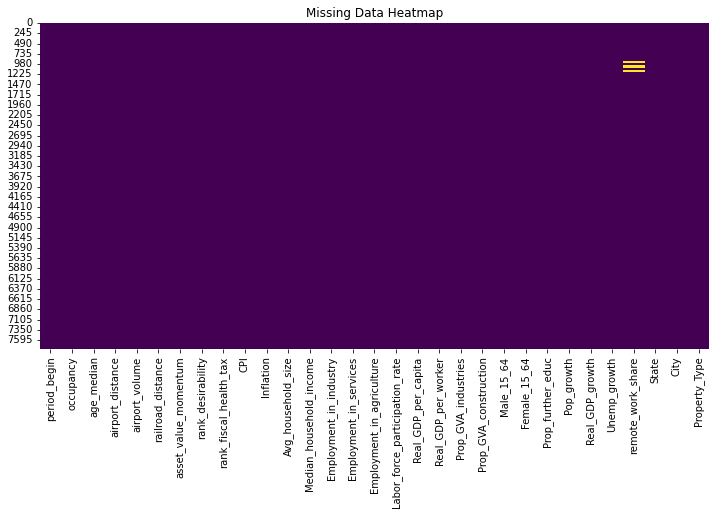

In [3]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(commercial_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [12]:
import numpy as np

def analyze_target_variables(df, exclude_city_for_remote_work):
    # Define the target variables
    target_variables = ['asset_value_momentum', 'rank_desirability', 'remote_work_share', 'occupancy']

    # Loop through each target variable and perform analysis
    for var in target_variables:
        print(f"\nAnalyzing: {var}")

        # Exclude specific city for 'remote_work_share'
        if var == 'remote_work_share':
            df_filtered = df[df['City'] != exclude_city_for_remote_work]
        else:
            df_filtered = df

        # Summary Statistics
        print("\nSummary Statistics:")
        print(df_filtered[var].describe())

        # Histogram
        plt.figure()
        df_filtered[var].hist(bins=30)
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {var}')
        plt.show()

        # Box Plot
        plt.figure()
        sns.boxplot(x=df_filtered[var])
        plt.title(f'Box Plot of {var}')
        plt.show()

        # Line Plot
        plt.figure()
        df_filtered.groupby('period_begin')[var].mean().plot()
        plt.xlabel('Time')
        plt.ylabel(var)
        plt.title(f'Time Series Line Plot of {var}')
        plt.show()



Analyzing: asset_value_momentum

Summary Statistics:
count    7819.000000
mean        0.021472
std         0.166243
min        -0.515672
25%        -0.082763
50%         0.007871
75%         0.086717
max         0.589325
Name: asset_value_momentum, dtype: float64


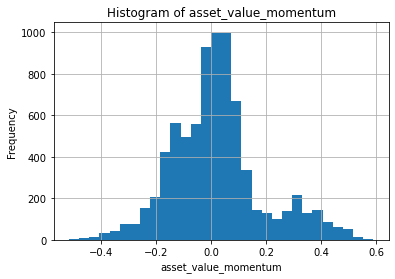

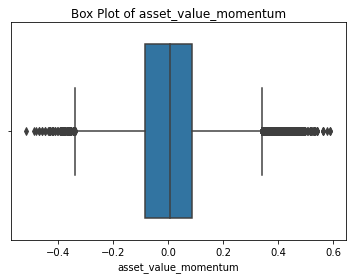

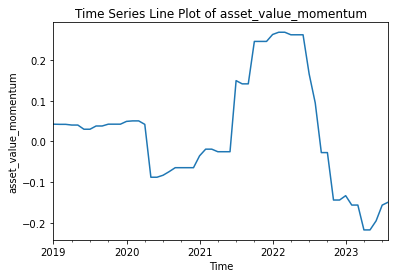


Analyzing: rank_desirability

Summary Statistics:
count    7819.000000
mean       24.606599
std        14.422604
min         1.000000
25%        12.000000
50%        24.000000
75%        37.000000
max        56.000000
Name: rank_desirability, dtype: float64


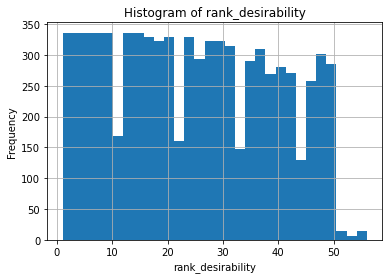

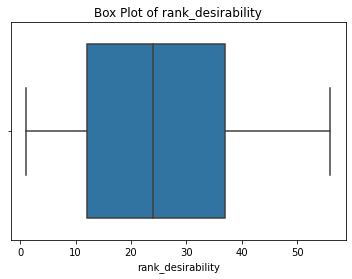

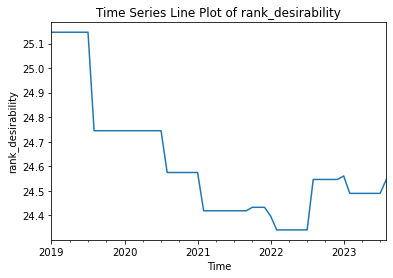


Analyzing: remote_work_share

Summary Statistics:
count    7483.000000
mean       10.713571
std         5.415361
min         0.240000
25%         5.700000
50%        10.660000
75%        14.345000
max        31.940000
Name: remote_work_share, dtype: float64


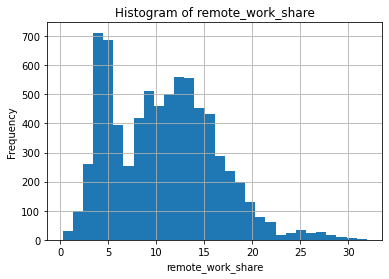

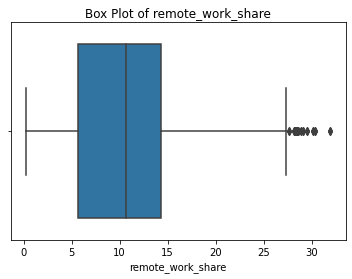

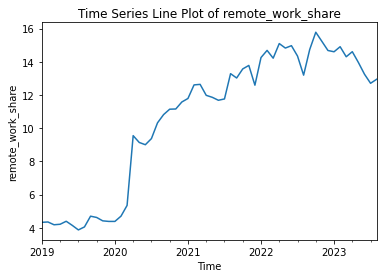


Analyzing: occupancy

Summary Statistics:
count    7819.000000
mean        0.904397
std         0.040724
min         0.738000
25%         0.880000
50%         0.909729
75%         0.934000
max         0.988651
Name: occupancy, dtype: float64


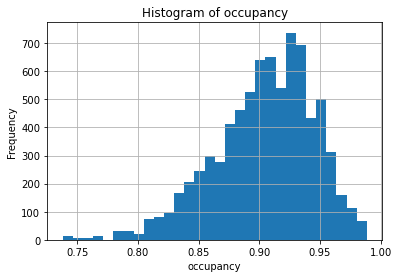

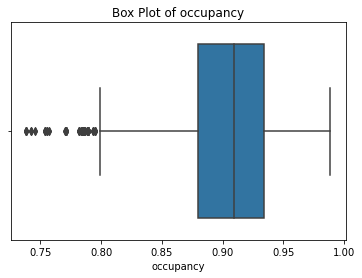

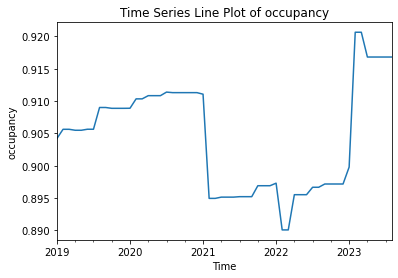

In [13]:
analyze_target_variables(commercial_data, 'Jersey City')


### Élan de la Valeur des Actifs
- L'`élan de la valeur des actifs` a une moyenne proche de zéro et une distribution légèrement asymétrique à droite, indiquant qu'il y a plus de cas de momentum légèrement positif dans les valeurs d'actifs.
- L'écart-type est relativement important par rapport à la moyenne, suggérant une grande variabilité du momentum.
- L'histogramme montre une distribution en forme de cloche avec une queue s'étendant vers les valeurs plus élevées, ce qui est confirmé par le diagramme en boîte qui montre plusieurs outliers à l'extrémité supérieure.
- Le graphique linéaire des séries temporelles indique une certaine volatilité dans le temps, avec un pic notable autour du début de 2022, suivi d'un déclin rapide.

### Classement de Désirabilité
- La variable `classement de désirabilité` semble être uniformément distribuée, ce qui est évident à partir de l'histogramme plat et des statistiques résumées montrant une moyenne approximativement au milieu de la plage min-max.
- L'écart-type est modéré, suggérant une variabilité mais avec une diffusion constante à travers les rangs.
- Le graphique linéaire des séries temporelles montre une stabilité relative du rang de désirabilité dans le temps, avec de légères fluctuations, indiquant que le rang de désirabilité ne change pas drastiquement sur la période observée.

### Part du Télétravail (Excluant Jersey City)
- La `part du télétravail` affiche une moyenne d'environ 10,71, avec un écart-type suggérant qu'il y a une dispersion modérée autour de la moyenne.
- L'histogramme pour la part du télétravail indique une distribution qui est quelque peu normale mais avec une asymétrie à droite, montrant qu'il y a des villes avec des pourcentages de télétravail inhabituellement élevés.
- Le graphique linéaire des séries temporelles montre une tendance croissante de la part du télétravail dans le temps, ce qui pourrait indiquer un virage vers plus de télétravail ces dernières années. Ceci est particulièrement évident à partir de 2020, reflétant probablement l'impact de la pandémie de COVID-19.

### Taux d'Occupation
- Le taux d'`occupation` a une moyenne élevée d'environ 0,90, suggérant qu'en moyenne, les propriétés commerciales ont un taux d'occupation élevé.
- La distribution des taux d'occupation est asymétrique à gauche avec une concentration de valeurs plus proches de l'extrémité supérieure de la plage, comme le montre l'histogramme.
- Le diagramme en boîte confirme l'asymétrie à gauche avec quelques outliers à l'extrémité inférieure, indiquant certaines propriétés avec des taux d'occupation significativement plus bas.
- Le graphique linéaire montre quelques fluctuations dans le temps avec une augmentation marquée des taux d'occupation à la fin de la période observée.

### Observations Générales et Implications
- Le récent déclin de l'élan de la valeur des actifs pourrait être un point de préoccupation ou d'intérêt, justifiant éventuellement une enquête plus approfondie sur les causes de cette baisse.
- La stabilité du classement de désirabilité suggère que la désirabilité des emplacements pour les propriétés commerciales reste relativement constante, ce qui pourrait impliquer un marché stable en termes de préférence de localisation.
- L'augmentation de la part du télétravail pourrait avoir des implications importantes pour la demande de propriétés commerciales et les valeurs d'actifs. Il serait important de suivre si la tendance croissante se poursuit après la pandémie.
- Les taux d'occupation généralement élevés sont un signe positif pour le marché immobilier commercial, mais une attention particulière devrait être accordée aux outliers avec une faible occupation pour comprendre s'ils représentent un type particulier de propriété ou un emplacement sous-performant.

Cette EDA initiale fournit des aperçus précieux et soulève des questions pour une analyse plus approfondie. Il serait prudent de continuer à surveiller ces tendances et de se pencher davantage sur les facteurs qui entraînent les changements, en particulier pour l'élan de la valeur des actifs et les tendances du télétravail, car ceux-ci peuvent avoir des implications significatives pour les futurs investissements et développements immobiliers commerciaux.

In [44]:
import seaborn as sns

# Initialize the HousingData class
housing_data = HousingData('housing')  # Update the path if necessary

# Load the residential property data
residential_data = housing_data.load_data(is_commercial=False)

residential_data.head()

,period_begin,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,price_drops,off_market_in_two_weeks,remote_work_share,asset_value_momentum,State,City,Property_Type
0,2019-01-31,235325.00,219900.0,110.096646,151.237964,1.5,2.0,3.0,8.5,6.25,82.0,0.997393,0.000000,0.291667,0.000000,0.00,0.000000,WV,Morgantown,Single Family Residential
1,2019-02-28,93318.75,201175.0,76.666452,87.459703,2.5,2.0,5.5,11.0,4.50,34.0,0.954067,0.000000,0.091667,0.833333,0.47,-0.303644,WV,Morgantown,Single Family Residential
2,2019-03-31,229050.00,233550.0,105.365398,107.310756,2.5,3.0,5.0,11.5,5.10,71.0,0.990710,0.666667,0.195833,0.500000,0.86,0.374335,WV,Morgantown,Single Family Residential
3,2019-04-30,238625.00,280950.0,126.764886,111.629672,2.5,4.0,7.0,13.0,5.35,75.0,0.974234,0.000000,0.392857,0.533333,1.09,0.203098,WV,Morgantown,Single Family Residential
4,2019-05-31,292200.00,272497.5,100.634255,114.556379,5.0,3.0,5.0,13.0,2.75,74.5,0.976480,0.333333,0.422619,0.166667,1.13,-0.206135,WV,Morgantown,Single Family Residential


In [48]:
residential_data = residential_data[residential_data.Property_Type != 'Mall']
residential_data = residential_data[residential_data.Property_Type != 'Office']
residential_data = residential_data[residential_data.Property_Type != 'Industrial']

In [51]:
residential_data.to_csv('residential_dataset.csv')

In [52]:
# Calculate the number of missing values in each column
missing_values = residential_data.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (residential_data.isnull().sum() / len(residential_data)) * 100

# Combine the counts and percentages into a DataFrame
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

missing_data_df[missing_data_df['Missing Values'] > 0]


,Missing Values,Percentage
median_sale_price,26807,13.330913
median_list_price,35970,17.887602
median_ppsf,27830,13.839643
median_list_ppsf,35971,17.888099
homes_sold,26807,13.330913
pending_sales,38838,19.313836
new_listings,36198,18.000985
inventory,33748,16.782619
months_of_supply,32298,16.061545
median_dom,27521,13.685980


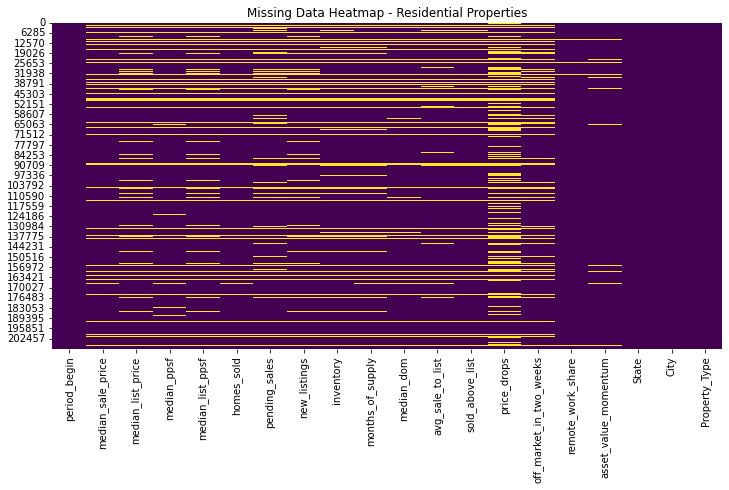

In [54]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(residential_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap - Residential Properties')
plt.show()

In [55]:
# Group by city and calculate the percentage of missing median_ppsf values for each city
percentage_missing_ppsf_by_city = residential_data.groupby('City')['median_ppsf'].apply(
    lambda x: (x.isnull().sum() / len(x)) * 100
)

# Convert to DataFrame for better visualization and handling
percentage_missing_ppsf_df = percentage_missing_ppsf_by_city.reset_index(name='Percentage Missing median_ppsf')

# Display the percentages for each city
print(percentage_missing_ppsf_df)

# Describe the statistics of these percentages
stats_description = percentage_missing_ppsf_df['Percentage Missing median_ppsf'].describe()
print("\nStatistics Description of Missing median_ppsf Percentages:")
print(stats_description)


           City  Percentage Missing median_ppsf
0       Abilene                       28.947368
1       Addison                       20.175439
2         Aiken                       26.315789
3         Akron                       10.526316
4       Alameda                        3.070175
..          ...                             ...
825     Yonkers                        8.333333
826        York                        0.438596
827  Youngstown                       30.263158
828   Ypsilanti                        5.263158
829        Yuma                       23.684211

[830 rows x 2 columns]

Statistics Description of Missing median_ppsf Percentages:
count    830.000000
mean      15.154282
std       14.741184
min        0.000000
25%        2.631579
50%       11.842105
75%       24.122807
max      100.000000
Name: Percentage Missing median_ppsf, dtype: float64


In [59]:
# Calculate the mean percentage of missing 'median_ppsf' values
mean_percentage_missing_ppsf = percentage_missing_ppsf_df['Percentage Missing median_ppsf'].mean()

# Count cities where percentage missing 'median_ppsf' is greater than the mean
num_cities_above_mean = (percentage_missing_ppsf_df['Percentage Missing median_ppsf'] > mean_percentage_missing_ppsf).sum()

# Print the result
print(f"Number of cities with missing 'median_ppsf' percentage higher than the mean: {num_cities_above_mean}")


Number of cities with missing 'median_ppsf' percentage higher than the mean: 365


In [60]:
# Assuming percentage_missing_ppsf_df is your DataFrame from the previous example
# Calculate the mean percentage of missing 'median_ppsf' values
mean_percentage_missing_ppsf = percentage_missing_ppsf_df['Percentage Missing median_ppsf'].mean()

# Filter cities where percentage missing 'median_ppsf' is greater than the mean
cities_above_mean = percentage_missing_ppsf_df[percentage_missing_ppsf_df['Percentage Missing median_ppsf'] > mean_percentage_missing_ppsf]

# Print the filtered DataFrame
print(cities_above_mean)


            City  Percentage Missing median_ppsf
0        Abilene                       28.947368
1        Addison                       20.175439
2          Aiken                       26.315789
8          Allen                       30.701754
9      Allentown                       15.789474
..           ...                             ...
816  Winter Park                       16.228070
820     Woodland                       23.684211
824       Yakima                       20.183486
827   Youngstown                       30.263158
829         Yuma                       23.684211

[365 rows x 2 columns]


In [62]:
cities_above_mean.to_csv('cities_above_mean.csv')

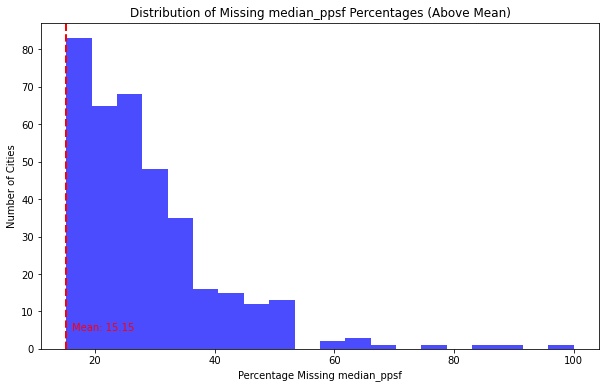

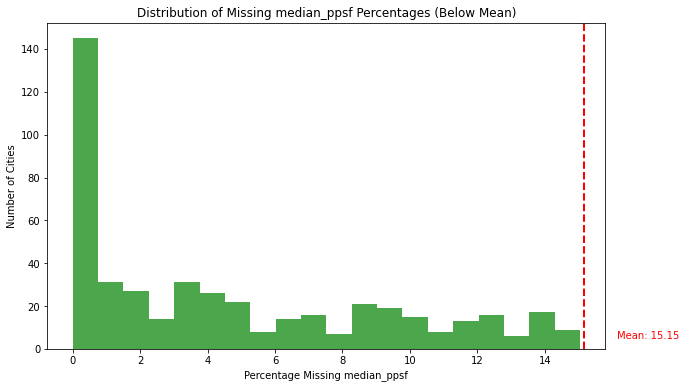

In [61]:
import matplotlib.pyplot as plt

# Calculate the mean percentage of missing 'median_ppsf' values
mean_percentage_missing_ppsf = percentage_missing_ppsf_df['Percentage Missing median_ppsf'].mean()

# Filter cities based on above or below mean
cities_above_mean = percentage_missing_ppsf_df[percentage_missing_ppsf_df['Percentage Missing median_ppsf'] > mean_percentage_missing_ppsf]
cities_below_mean = percentage_missing_ppsf_df[percentage_missing_ppsf_df['Percentage Missing median_ppsf'] <= mean_percentage_missing_ppsf]

# Plot for cities above the mean
plt.figure(figsize=(10, 6))
plt.hist(cities_above_mean['Percentage Missing median_ppsf'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Missing median_ppsf Percentages (Above Mean)')
plt.xlabel('Percentage Missing median_ppsf')
plt.ylabel('Number of Cities')
plt.axvline(mean_percentage_missing_ppsf, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_percentage_missing_ppsf + 1, 5, f'Mean: {mean_percentage_missing_ppsf:.2f}', color='red')
plt.show()

# Plot for cities below the mean
plt.figure(figsize=(10, 6))
plt.hist(cities_below_mean['Percentage Missing median_ppsf'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Missing median_ppsf Percentages (Below Mean)')
plt.xlabel('Percentage Missing median_ppsf')
plt.ylabel('Number of Cities')
plt.axvline(mean_percentage_missing_ppsf, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_percentage_missing_ppsf + 1, 5, f'Mean: {mean_percentage_missing_ppsf:.2f}', color='red')
plt.show()


In [63]:
# Filter cities with less than 25% missing 'median_ppsf' values
filtered_data = percentage_missing_ppsf_df[percentage_missing_ppsf_df['Percentage Missing median_ppsf'] < 25]
selected_cities = filtered_data['City']

# Select data for these cities
selected_data = residential_data[residential_data['City'].isin(selected_cities)]

# Choose an imputation strategy (mean or median)
# For mean imputation
selected_data['median_ppsf'] = selected_data['median_ppsf'].fillna(selected_data['median_ppsf'].mean())


/tmp/ipykernel_1418295/952080597.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['median_ppsf'] = selected_data['median_ppsf'].fillna(selected_data['median_ppsf'].mean())


In [68]:
from tqdm import tqdm 
# Filter cities with less than 25% missing 'median_ppsf' values
filtered_data = percentage_missing_ppsf_df[percentage_missing_ppsf_df['Percentage Missing median_ppsf'] < 25]
selected_cities = filtered_data['City']

# Select data for these cities
selected_data = residential_data[residential_data['City'].isin(selected_cities)]

# Apply filling per city and property type
for city in tqdm(selected_cities, desc='Iterating through cities'):
    for property_type in selected_data['Property_Type'].unique():
        # Filter data for specific city and property type
        city_type_data = selected_data[(selected_data['City'] == city) & (selected_data['Property_Type'] == property_type)]
        
        # Calculate mean or median for the specific city and property type
        fill_value = city_type_data['median_ppsf'].mean()  # or median()
        
        # Apply the calculated mean/median to fill missing values
        selected_data.loc[(selected_data['City'] == city) & (selected_data['Property_Type'] == property_type), 'median_ppsf'] = city_type_data['median_ppsf'].fillna(fill_value)


Iterating through cities:   0%|          | 0/640 [00:00<?, ?it/s]

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
Iterating through cities: 100%|██████████| 640/640 [01:52<00:00,  5.71it/s]


In [79]:
def calculate_momentum(group):
    # Sort the group by the time period
    group = group.sort_values('period_begin')
    
    # Calculate the percentage change
    group['asset_value_momentum'] = group['median_ppsf'].pct_change()
    
    # Set the first value of the calculated momentum to 0 or NaN
    group['asset_value_momentum'].iloc[0] = 0

    return group

# Group by city and property type, then apply the momentum calculation
selected_data = selected_data.groupby(['City', 'Property_Type']).apply(calculate_momentum)

# Reset the index if needed
selected_data = selected_data.reset_index(drop=True)


In [80]:
selected_data.to_csv('selected_data.csv')

In [81]:
# Dropping the 'median_ppsf' and 'median_list_ppsf' columns from the DataFrame
selected_data = selected_data.drop(columns=['median_ppsf', 'median_list_ppsf'])

In [82]:
def calculate_zero_momentum_percentage(group):
    zero_count = (group['asset_value_momentum'] == 0).sum()
    total_count = len(group)
    return (zero_count / total_count) * 100

# Group by city and property type and calculate the percentage
zero_momentum_percentage = selected_data.groupby(['City', 'Property_Type']).apply(calculate_zero_momentum_percentage).reset_index(name='Zero Momentum Percentage')

# Display the result
print(zero_momentum_percentage)

# Descriptive statistics
stats_description = zero_momentum_percentage['Zero Momentum Percentage'].describe()
print("\nStatistics Description of Zero Momentum Percentages:")
print(stats_description)


           City              Property_Type  Zero Momentum Percentage
0       Addison                      Condo                  1.754386
1       Addison    Multi-Family (2-4 Unit)                 63.157895
2       Addison  Single Family Residential                  1.754386
3       Addison                  Townhouse                  1.754386
4         Akron                      Condo                  1.754386
...         ...                        ...                       ...
2483  Ypsilanti                      Condo                  1.754386
2484  Ypsilanti    Multi-Family (2-4 Unit)                  3.508772
2485  Ypsilanti  Single Family Residential                  1.754386
2486       Yuma    Multi-Family (2-4 Unit)                 24.561404
2487       Yuma  Single Family Residential                  1.754386

[2488 rows x 3 columns]

Statistics Description of Zero Momentum Percentages:
count    2488.000000
mean       11.826103
std        20.814349
min         1.754386
25%      

In [83]:
zero_momentum_percentage.to_csv('zero_momentum_percentage.csv')

In [84]:
def calculate_zero_momentum_percentage(group):
    zero_count = (group['asset_value_momentum'] == 0).sum()
    total_count = len(group)
    return (zero_count / total_count) * 100

# Group by city and property type and calculate the percentage
zero_momentum_by_city_property = selected_data.groupby(['City', 'Property_Type']).apply(calculate_zero_momentum_percentage).reset_index(name='Zero Momentum Percentage')

# Group by property type and calculate the mean percentage
mean_zero_momentum_by_property = zero_momentum_by_city_property.groupby('Property_Type')['Zero Momentum Percentage'].mean()

# Display the result
print(mean_zero_momentum_by_property)


Property_Type
Condo                         8.156769
Multi-Family (2-4 Unit)      19.901035
Single Family Residential     6.896710
Townhouse                    12.733874
Name: Zero Momentum Percentage, dtype: float64


In [85]:
# Step 1 & 2: Remove rows where Zero Momentum Percentage exceeds the property type mean
filtered_data = zero_momentum_by_city_property.apply(
    lambda row: row['Zero Momentum Percentage'] <= mean_zero_momentum_by_property[row['Property_Type']], axis=1
)
reduced_df = zero_momentum_by_city_property[filtered_data]

# Step 3: Calculate the percentage of the dataframe removed
original_count = len(zero_momentum_by_city_property)
reduced_count = len(reduced_df)
percentage_removed = ((original_count - reduced_count) / original_count) * 100
print(f"Percentage of dataframe removed: {percentage_removed:.2f}%")

# Step 4: Recalculate mean_zero_momentum_by_property
mean_zero_momentum_by_property_updated = reduced_df.groupby('Property_Type')['Zero Momentum Percentage'].mean()
print("\nUpdated Mean Zero Momentum Percentages by Property Type:")
print(mean_zero_momentum_by_property_updated)


Percentage of dataframe removed: 19.29%

Updated Mean Zero Momentum Percentages by Property Type:
Property_Type
Condo                        2.053887
Multi-Family (2-4 Unit)      4.742175
Single Family Residential    1.770331
Townhouse                    2.455347
Name: Zero Momentum Percentage, dtype: float64


In [90]:
# Merge the reduced_df with the original selected_data dataframe
filtered_selected_data = pd.merge(selected_data, reduced_df[['City', 'Property_Type']], on=['City', 'Property_Type'], how='inner')

0     True
1    False
2     True
3     True
4     True
dtype: bool

In [1]:
from src.preprocessing.housing_data import HousingData
directory_path = 'housing' 
housing_data = HousingData(directory_path)

# Load the processed residential data
filtered_selected_data = housing_data.load_residential_data()


Loading residential data...
Initial residential data rows: 209046
Rows after excluding certain property types: 201089
Rows removed during exclusion: 7957
Calculating missing value percentages and filtering cities...
Rows after filtering cities: 159727
Rows removed during city filter: 41362
Filling missing values and calculating asset value momentum...


Filling missing values per city and property type: 100%|██████████| 640/640 [01:55<00:00,  5.56it/s]


Filtering data based on zero momentum percentage...
Final rows after all processing: 117128
Total rows removed during processing: 91918


In [5]:
# Initialize the HousingData class
housing_data = HousingData('housing')  # Update the path

# Load the commercial property data
commercial_data = housing_data.load_data(is_commercial=True)

# Display the first few rows of the DataFrame
commercial_data.head()

,period_begin,occupancy,age_median,airport_distance,airport_volume,railroad_distance,asset_value_momentum,rank_desirability,rank_fiscal_health_tax,CPI,...,Male_15_64,Female_15_64,Prop_further_educ,Pop_growth,Real_GDP_growth,Unemp_growth,remote_work_share,State,City,Property_Type
0,2019-01-31,0.870596,34.561672,11.249427,134233128.0,1.682482,0.020171,49.0,31.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,5.86,IN,Indianapolis,Office
1,2019-02-28,0.875000,34.561672,11.249427,134233128.0,1.682482,0.020171,49.0,47.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,5.72,IN,Indianapolis,Office
2,2019-03-31,0.875000,34.561672,11.246551,134233128.0,1.680030,0.020171,49.0,47.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,4.09,IN,Indianapolis,Office
3,2019-04-30,0.875000,34.561672,11.246551,134233128.0,1.680030,0.021114,49.0,47.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,4.98,IN,Indianapolis,Office
4,2019-05-31,0.875000,34.561672,11.246551,134233128.0,1.680030,0.021114,49.0,47.0,114.42,...,0.84,0.88,61.96,1.07,2.67,-6.25,4.93,IN,Indianapolis,Office


In [ ]:
directory_path = 'filtered_housing'  # Replace with your actual data directory path
housing_data = HousingData(directory_path)
housing_data.save_filtered_data(commercial_data)